In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_recall_curve,average_precision_score,roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance, XGBClassifier
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [7]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
occ=df['Class'].value_counts()
print(occ)

0    284315
1       492
Name: Class, dtype: int64


In [6]:
# ratio of fraud tractions (about 0.17% of fraud tractions- extreamly imbalanced data)
occ_percentage=occ/len(df)
print(occ_percentage)

0    0.998273
1    0.001727
Name: Class, dtype: float64


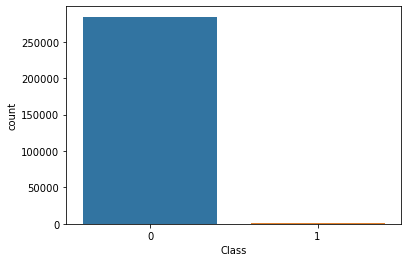

In [9]:
# barplot for the fraud and non-fraud
sns.countplot(x='Class', data=df)
plt.show()

In [8]:
df=df.drop(columns=['Time'])  # remove the column time - not helpful for modeling

In [26]:
amount=np.array(df['Amount']).reshape(-1,1)  # reshape amount column for scaler
amount

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [28]:
scaler=StandardScaler()
scaled_amount=scaler.fit_transform(amount)
scaled_amount

array([[ 0.24496426],
       [-0.34247454],
       [ 1.16068593],
       ...,
       [-0.0818393 ],
       [-0.31324853],
       [ 0.51435531]])

In [30]:
df['Amount']=pd.Series(np.ravel(scaled_amount))
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [31]:
# split data for training and testing
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=123)


In [32]:
# applying over sample method for model training
over_sample=RandomOverSampler()
X_resample, y_resample=over_sample.fit_sample(X_train, y_train)
print(X_resample.shape, y_resample.shape)

(398064, 29) (398064,)


In [33]:
# apply smote method (synthetic miniority over sampling technique)
smote=SMOTE()
X_smote, y_smote=smote.fit_sample(X_train, y_train)

In [34]:
# Original y_train different class numbers: fraud only 377 counts
print(pd.value_counts(pd.Series(y_train)))

0    199032
1       332
dtype: int64


In [35]:
# after applying SMOTE resmapling method --it generated the same number for each class
print(pd.value_counts(pd.Series(y_smote)))

1    199032
0    199032
dtype: int64


### model training

In [36]:
# use Logistic Regression to train over_sample data (base LR model has high recall score hoever extreamly low precision score )
LR=LogisticRegression()
LR.fit(X_resample,y_resample)
y_pred_oversample=LR.predict(X_test)
print(classification_report(y_test,y_pred_oversample))
print('Accuracy score:',accuracy_score(y_test,y_pred_oversample))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85283
           1       0.07      0.91      0.12       160

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy score: 0.9753285816275178


In [37]:
# use Logistic Regression to train smote resample data
LR=LogisticRegression()
LR.fit(X_smote,y_smote)
y_pred_smote=LR.predict(X_test)
print(classification_report(y_test,y_pred_smote))
print('Accuracy score:',accuracy_score(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85283
           1       0.06      0.92      0.11       160

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.98     85443

Accuracy score: 0.973374062240324


In [38]:
# Use Random Forest Ensemble model to train the resample data --Random Forest has achived high precision score and recall score of 0.81
RF=RandomForestClassifier(max_depth=500)
RF.fit(X_resample,y_resample)
y_RF_resample=RF.predict(X_test)
print(classification_report(y_test,y_RF_resample))
print('Accuracy score:',accuracy_score(y_test,y_RF_resample))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.96      0.81      0.87       160

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy score: 0.9995669627705019


In [39]:
probs=RF.predict_proba(X_test)
print(roc_auc_score(y_test,probs[:,1]))

0.9642351787577829


In [40]:
# Use Random Forest Ensemble model to train the resample data  (SMOTE resampling did not generate bettwe modeling than over sampling)
RF=RandomForestClassifier()
RF.fit(X_smote,y_smote)
y_RF_smote=RF.predict(X_test)
print(classification_report(y_test,y_RF_smote))
print('Accuracy score:',accuracy_score(y_test,y_RF_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.87      0.82      0.85       160

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy score: 0.9994382219725431


In [41]:
# using voting machine Ensemble model (increase precision score)
clf1=LogisticRegression()
clf2=RandomForestClassifier(random_state=1)
#clf3=GaussianNB()
#clf4=SVC()
ensemble=VotingClassifier(estimators=[('LR',clf1), ('RF',clf2)], voting='hard')
ensemble.fit(X_smote,y_smote)
y_ensem=ensemble.predict(X_test)
print(classification_report(y_test,y_ensem))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.89      0.82      0.85       160

    accuracy                           1.00     85443
   macro avg       0.94      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [42]:
#clf1=LogisticRegression()
clf2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()
clf4=SVC()
ensemble=VotingClassifier(estimators=[('RF',clf2), ('NB',clf3), ('SVM', clf4)], voting='hard')
ensemble.fit(X_smote,y_smote)
y_ensem=ensemble.predict(X_test)
print(classification_report(y_test,y_ensem))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.64      0.86      0.73       160

    accuracy                           1.00     85443
   macro avg       0.82      0.93      0.87     85443
weighted avg       1.00      1.00      1.00     85443



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.73      0.87      0.79       160

    accuracy                           1.00     85443
   macro avg       0.86      0.93      0.90     85443
weighted avg       1.00      1.00      1.00     85443
 [[85231    52]
 [   21   139]]


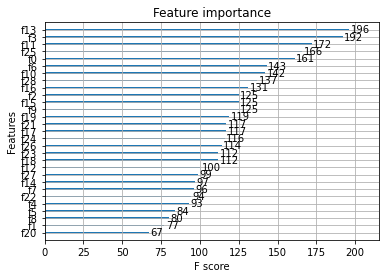

In [45]:
# using XGboost for model tuning  (has significently increased the recall score of class 1)
xgb=XGBClassifier()
xgb.fit(X_smote,y_smote)
y_xgb=xgb.predict(X_test)
print(classification_report(y_test,y_xgb), confusion_matrix(y_test,y_xgb))
plot_importance(xgb,importance_type='weight')
plt.show()


In [46]:
print(xgb.get_booster().get_score(importance_type='weight'))

{'f13': 196, 'f3': 192, 'f0': 161, 'f9': 125, 'f28': 137, 'f24': 116, 'f25': 166, 'f17': 117, 'f15': 125, 'f11': 172, 'f10': 142, 'f14': 97, 'f2': 125, 'f6': 143, 'f7': 96, 'f18': 112, 'f19': 119, 'f8': 80, 'f27': 99, 'f21': 117, 'f1': 77, 'f20': 67, 'f16': 131, 'f26': 114, 'f4': 93, 'f5': 84, 'f12': 100, 'f22': 94, 'f23': 112}


In [47]:
class MyXGBClassifier(XGBClassifier):  # fix a bug to create this class
	@property
	def coef_(self):
		return None

In [48]:
## Using automated code to evaluate the number of features for modeling
model=MyXGBClassifier()
model.fit(X_smote,y_smote)
y_model=model.predict(X_test)
recall=recall_score(y_test,y_model)
print("recall: %.2f%%" % (recall * 100.0))

recall: 86.88%


In [49]:
model.feature_importances_

array([0.0128224 , 0.0121735 , 0.01934584, 0.06208566, 0.01085198,
       0.00776132, 0.00672811, 0.03373761, 0.00672755, 0.01016142,
       0.00942419, 0.02789893, 0.00787366, 0.62640476, 0.00894082,
       0.00543422, 0.01266047, 0.01679477, 0.01352494, 0.01501292,
       0.01240489, 0.00677495, 0.00363787, 0.00402623, 0.00632723,
       0.00869429, 0.01177217, 0.00689508, 0.01310214], dtype=float32)

In [50]:
## iterating the process to find the best recall score  (highest recall score is n=3 with the threshold=0.047)
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_smote)
    # train model
    selection_model =MyXGBClassifier()
    selection_model.fit(select_X_train, y_smote)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    recall = recall_score(y_test, predictions)
    accuracy=accuracy_score(y_test, predictions)
    f1=f1_score(y_test, predictions)
    print("Thresh,  n, recall, accuracy,f1_score", (thresh, select_X_train.shape[1], round(recall,2), round(accuracy, 2), round(f1,2)))

Thresh,  n, recall, accuracy,f1_score (0.003637869, 29, 0.87, 1.0, 0.79)
Thresh,  n, recall, accuracy,f1_score (0.0040262314, 28, 0.88, 1.0, 0.78)
Thresh,  n, recall, accuracy,f1_score (0.005434215, 27, 0.86, 1.0, 0.78)
Thresh,  n, recall, accuracy,f1_score (0.006327227, 26, 0.89, 1.0, 0.79)
Thresh,  n, recall, accuracy,f1_score (0.0067275455, 25, 0.88, 1.0, 0.78)
Thresh,  n, recall, accuracy,f1_score (0.006728111, 24, 0.89, 1.0, 0.79)
Thresh,  n, recall, accuracy,f1_score (0.0067749475, 23, 0.88, 1.0, 0.77)
Thresh,  n, recall, accuracy,f1_score (0.006895078, 22, 0.88, 1.0, 0.78)
Thresh,  n, recall, accuracy,f1_score (0.007761323, 21, 0.88, 1.0, 0.76)
Thresh,  n, recall, accuracy,f1_score (0.007873659, 20, 0.87, 1.0, 0.75)
Thresh,  n, recall, accuracy,f1_score (0.008694294, 19, 0.87, 1.0, 0.74)
Thresh,  n, recall, accuracy,f1_score (0.008940819, 18, 0.88, 1.0, 0.74)
Thresh,  n, recall, accuracy,f1_score (0.009424185, 17, 0.87, 1.0, 0.73)
Thresh,  n, recall, accuracy,f1_score (0.0101614

#### Summary: depends on the business needs, the features can be selected to achive the modeling needs. The n=24, the highest f1 score and recall score are achived. The n=15 has the good balanced recall score and f1 score with the accuracy score close to 1.0  